In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import mlxtend
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout


from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.compat.v1.Session(config=config)

# import os
# os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"  
# os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

E:\Anaconda5.2\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
E:\Anaconda5.2\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
E:\Anaconda5.2\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
E:\Anaconda5.2\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of 

In [2]:
print(tf.__version__)

2.0.0-alpha0


In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl

In [4]:
from tensorflow.keras.datasets import cifar10

In [5]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [6]:
classes_name = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [7]:
X_train.max()

255

In [8]:
X_train = X_train / 255
X_test = X_test / 255

In [9]:
X_train.shape

(50000, 32, 32, 3)

In [10]:
X_test.shape

(10000, 32, 32, 3)

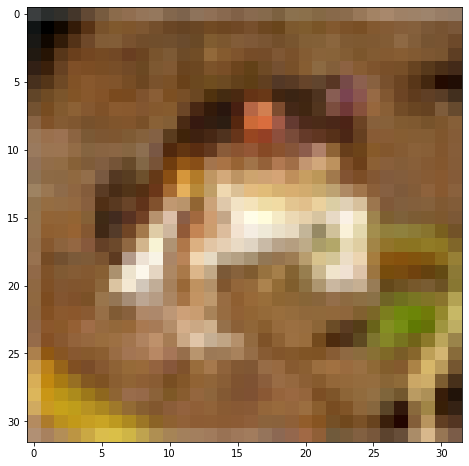

In [11]:
plt.figure(figsize=(8, 8))
plt.imshow(X_train[0])
plt.show()

In [12]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]])

## build CNN model

In [13]:
model = Sequential()

In [14]:
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=[32, 32, 3]))
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2, padding='valid'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1048704   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [16]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

## tf.keras.losses.sparse_categorical_crossentropy
## tf.keras.losses.SparseCategoricalCrossentropy
## 最明显的区别是sparse_categorical_crossentropy中在参数中指定y_true（真实标签值）以及y_pred（预测标签值）

<!-- ex:
y_true = tf.constant([1, 2])
y_pred = tf.constant([[0.05, 0.95, 0], [0.1, 0.8, 0.1]])
loss = tf.reduce_mean(tf.keras.losses.sparse_categorical_crossentropy(y_true, y_pred))
scce = tf.keras.losses.SparseCategoricalCrossentropy()

print(loss.numpy())
print(scce(y_true, y_pred).numpy()) -->


In [17]:
history = model.fit(X_train, y_train, batch_size=12, epochs=10, verbose=1, validation_data=(X_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 21s 421us/sample - loss: 1.3819 - sparse_categorical_accuracy: 0.5066 - val_loss: 1.0890 - val_sparse_categorical_accuracy: 0.6203
Epoch 2/10
50000/50000 [==============================] - 19s 375us/sample - loss: 1.0685 - sparse_categorical_accuracy: 0.6224 - val_loss: 0.9633 - val_sparse_categorical_accuracy: 0.6568
Epoch 3/10
50000/50000 [==============================] - 18s 355us/sample - loss: 0.9497 - sparse_categorical_accuracy: 0.6666 - val_loss: 0.9398 - val_sparse_categorical_accuracy: 0.6722
Epoch 4/10
50000/50000 [==============================] - 18s 364us/sample - loss: 0.8700 - sparse_categorical_accuracy: 0.6911 - val_loss: 0.9355 - val_sparse_categorical_accuracy: 0.6718
Epoch 5/10
50000/50000 [==============================] - 18s 356us/sample - loss: 0.8035 - sparse_categorical_accuracy: 0.7140 - val_loss: 0.8847 - val_sparse_categorical_accuracy: 0.6962
Epoch

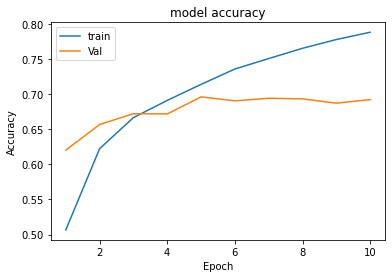

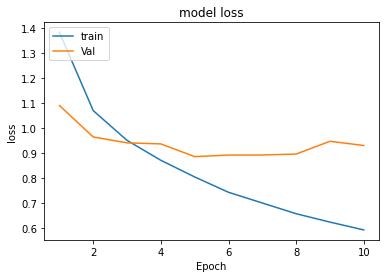

In [18]:
## Plot training & validation accuracy values
epoch_range = range(1, 11)
plt.plot(epoch_range, history.history['sparse_categorical_accuracy'])
plt.plot(epoch_range, history.history['val_sparse_categorical_accuracy'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["train", "Val"], loc='upper left')
plt.show()




## Plot training & validation accuracy values
epoch_range = range(1, 11)
plt.plot(epoch_range, history.history['loss'])
plt.plot(epoch_range, history.history['val_loss'])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("Epoch")
plt.legend(["train", "Val"], loc='upper left')
plt.show()

In [19]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [ ]:
# pred_1 = tf.argmax(model.predict(X_test), axis=-1)  ## 新写法

In [ ]:
# pred_1.numpy()

In [ ]:
# assert all(pred_1 == ypred)

In [20]:
ypred = model.predict_classes(X_test)

In [21]:
mat = confusion_matrix(y_test, ypred)

(<Figure size 864x864 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1717318cda0>)

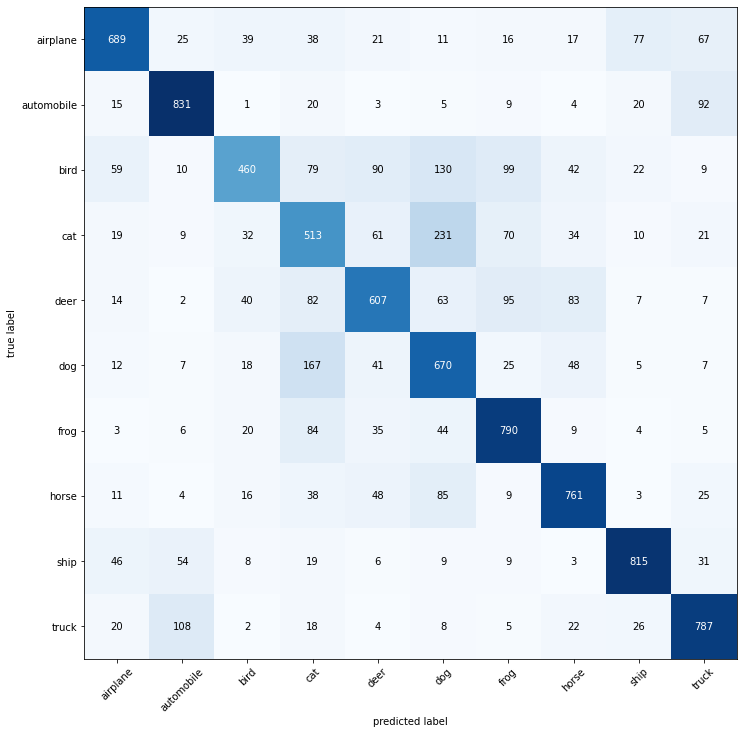

In [22]:
plot_confusion_matrix(mat, class_names=classes_name, figsize=(12, 12))

(<Figure size 864x864 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x171732f4f98>)

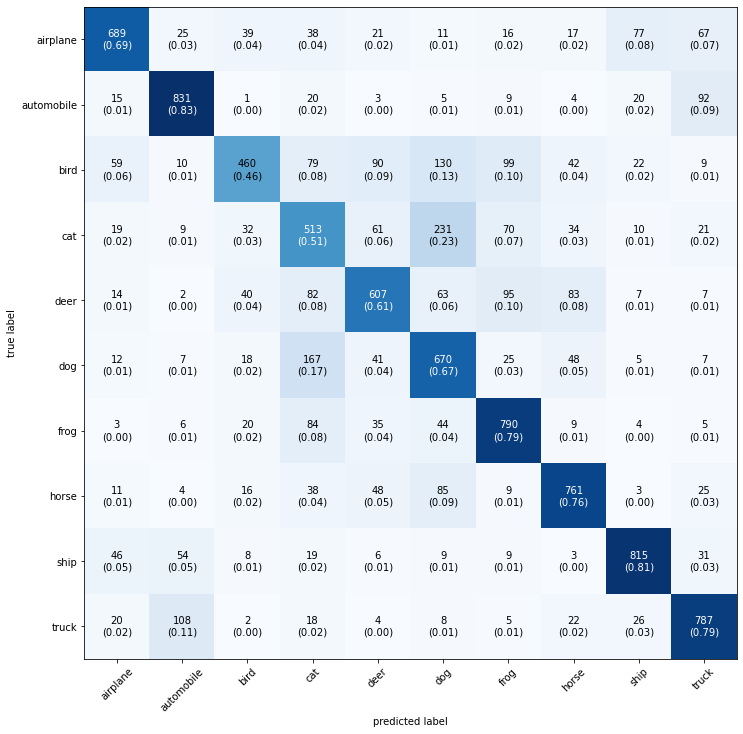

In [23]:
plot_confusion_matrix(mat, class_names=classes_name, figsize=(12, 12), show_normed=True)